- EDA2에서 진행한 전처리

1. 95% 이상 결측치 컬럼 제거
2. 수치형 변수 처리
    - 로그 변환 (4개)
    - 이진 범주화 (5개)
3. 범주형 변수 처리
    - Label Encoding
    - 시술 유형 그룹화
4. 시간 변수 처리
    - DI 시술 결측치 → 0
    - IVF 시술 결측치 → 중앙값

---

1. 피처 엔지니어링
    - 변수 간 상호작용 고려
    - 시계열적 특성 활용
    - 새로운 피처 


2. 결측치 처리 방법 개선
    - 현재는 단순 0 또는 중앙값 대체
    - 다른 방법 검토 필요


3. 변수 선택
    - 중요도 기반 변수 선택
    - 다중공선성 추가 검토

In [1]:
import pandas as pd
import numpy as np

# 데이터 로드
df = pd.read_csv("../data/processed_train.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   저장된 배아 수_log          256351 non-null  float64
 1   수집된 신선 난자 수_log       256351 non-null  float64
 2   혼합된 난자 수_log          256351 non-null  float64
 3   파트너 정자와 혼합된 난자 수_log  256351 non-null  float64
 4   미세주입 후 저장된 배아 수_cat   256351 non-null  int64  
 5   해동된 배아 수_cat          256351 non-null  int64  
 6   해동 난자 수_cat           256351 non-null  int64  
 7   저장된 신선 난자 수_cat       256351 non-null  int64  
 8   기증자 정자와 혼합된 난자 수_cat  256351 non-null  int64  
 9   시술 당시 나이_인코딩          256351 non-null  int64  
 10  난자 기증자 나이_인코딩         256351 non-null  int64  
 11  정자 기증자 나이_인코딩         256351 non-null  int64  
 12  총 시술 횟수_구간            256351 non-null  int64  
 13  클리닉 내 총 시술 횟수_구간      256351 non-null  int64  
 14  시술 유형_encoded         256351 non-null  int64  
 15  


`1. 시계열 특성 분석 방향:`
- 각 경과일 변수들 간의 상관관계 분석
- 각 시간 변수별 임신 성공률 추이 확인
- 시간 간격에 따른 성공률 패턴 파악
- 특정 시간대의 임신 성공률이 높은 구간 식별

- 분석 목표:
  - 시술 과정의 각 단계별 최적 시간 간격 파악
  - 시간 변수들 간의 상호작용이 임신 성공에 미치는 영향 이해
  - 중요한 시간적 패턴이나 임계점 발견

- 활용 방안:
  - 시간 간격에 따른 새로운 피처 생성 (예: 난자채취-배아이식 간격)
  - 임신 성공률이 높은 시간대를 기반으로 한 구간화
  - 시간 순서를 고려한 순차적 패턴 피처 생성

`2. 불임 원인 변수들의 다중공선성 분석:`
- VIF(Variance Inflation Factor) 계산
- 상관계수 행렬 생성
- 주성분 분석(PCA) 고려

- 분석 목표:
  - 불임 원인 변수들 간의 중복성 파악
  - 실제로 영향력 있는 핵심 변수 식별
  - 변수들 간의 잠재적 그룹 발견

- 활용 방안:
  - 고차원 불임 원인 데이터를 저차원으로 축소
  - 상호 연관된 불임 원인들을 새로운 통합 변수로 생성
  - 중요도가 낮은 변수 제거를 통한 모델 단순화

`3. 로그 변환 효과 검증:`
- 변환 전후 분포 비교 (skewness, kurtosis)
- QQ-plot을 통한 정규성 확인
- 로그 변환된 변수와 임신 성공률과의 관계 분석

- 분석 목표:
  - 변환의 실제 효과성 확인
  - 정규성 개선 정도 평가
  - 예측력 향상 여부 검증

- 활용 방안:
  - 더 효과적인 변환 방법 적용 (예: Box-Cox, Yeo-Johnson)
  - 변환이 불필요한 변수 원복
  - 비선형 관계를 가진 다른 변수들에 대한 추가 변환 고려



---

### 한글 폰트 설정

In [17]:
import matplotlib
print(matplotlib.matplotlib_fname())  # 적용된 matplotlibrc 파일 경로 확인
print(matplotlib.rcParams['font.family'])  # 현재 적용된 폰트 확인


/data/ephemeral/home/.cache/pypoetry/virtualenvs/fertimind-v9Yfc7Z6-py3.11/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
['sans-serif']


In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 (fc-list에서 확인한 폰트 사용)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 폰트를 matplotlib에 강제 추가
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

# 적용된 폰트 확인
print(f"현재 적용된 폰트: {plt.rcParams['font.family']}")

현재 적용된 폰트: ['NanumGothic']


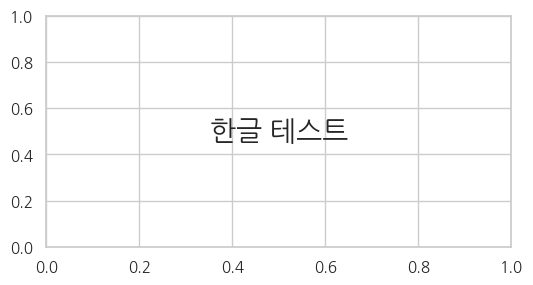

In [19]:
# 테스트 플롯
plt.figure(figsize=(6, 3))
plt.text(0.5, 0.5, "한글 테스트", fontsize=20, ha='center', va='center')
plt.show()

---

### 1. 시계열 특성 분석 방향

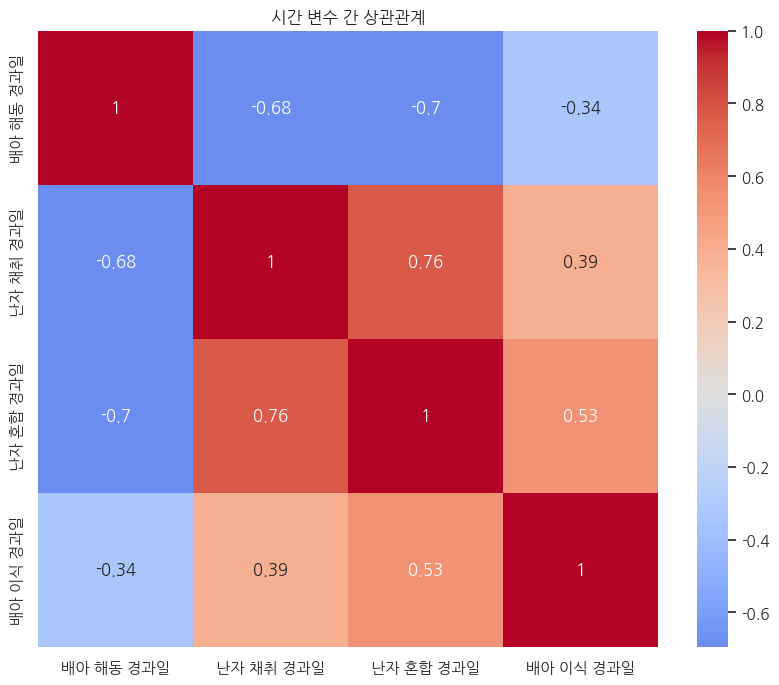

In [20]:
# 1. 시간 변수들 간의 상관관계 분석

time_cols = ['배아 해동 경과일', '난자 채취 경과일', '난자 혼합 경과일', '배아 이식 경과일']

correlation = df[time_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title("시간 변수 간 상관관계")
plt.show()

In [24]:
# 2. 각 시간 변수별 임신 성공률 분석
for col in time_cols:
    # 시간대별 그룹화 및 성공률 계산
    success_rate = df.groupby(col)['임신 성공 여부'].agg(['mean', 'count']).reset_index()
    success_rate.columns = [col, 'success_rate', 'count']
    
    # 기초 통계량 출력
    print(f"\n=== {col} 통계량 ===")
    print(df[col].describe())
    
    # 성공/실패 그룹별 분포 비교
    print(f"\n성공/실패 그룹별 {col} 평균")
    print(df.groupby('임신 성공 여부')[col].mean())


=== 배아 해동 경과일 통계량 ===
count    256351.000000
mean         -0.835339
std           0.415529
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max           7.000000
Name: 배아 해동 경과일, dtype: float64

성공/실패 그룹별 배아 해동 경과일 평균
임신 성공 여부
0   -0.828090
1   -0.856148
Name: 배아 해동 경과일, dtype: float64

=== 난자 채취 경과일 통계량 ===
count    256351.000000
mean         -0.224255
std           0.417092
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: 난자 채취 경과일, dtype: float64

성공/실패 그룹별 난자 채취 경과일 평균
임신 성공 여부
0   -0.229972
1   -0.207843
Name: 난자 채취 경과일, dtype: float64

=== 난자 혼합 경과일 통계량 ===
count    256351.000000
mean         -0.205359
std           0.421062
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: 난자 혼합 경과일, dtype: float64

성공/실패 그룹별 난자 혼합 경과일 평균
임신 성공 여부
0   -0.224612
1   -0.150088
Name: 난자 혼합 경과일, dtype: float64

===

In [25]:
# 각 시간 변수별 임신 성공률 분석
for col in time_cols:
    # N/A(-1)와 실제 경과일을 구분해서 성공률 계산
    na_success_rate = df[df[col] == -1]['임신 성공 여부'].mean()
    valid_success_rates = (df[df[col] != -1]
                          .groupby(col)['임신 성공 여부']
                          .agg(['count', 'mean'])
                          .reset_index())
    
    print(f"\n=== {col} 분석 ===")
    print(f"N/A 케이스 비율: {(df[col] == -1).mean():.2%}")
    print(f"N/A 케이스 임신 성공률: {na_success_rate:.2%}")
    print("\n실제 경과일별 통계:")
    print(valid_success_rates)


=== 배아 해동 경과일 분석 ===
N/A 케이스 비율: 84.25%
N/A 케이스 임신 성공률: 26.39%

실제 경과일별 통계:
   배아 해동 경과일  count      mean
0        0.0  39801  0.229668
1        1.0     37  0.162162
2        2.0    182  0.159341
3        3.0    164  0.109756
4        4.0     12  0.000000
5        5.0    140  0.214286
6        6.0     30  0.166667
7        7.0      3  0.000000

=== 난자 채취 경과일 분석 ===
N/A 케이스 비율: 22.43%
N/A 케이스 임신 성공률: 23.94%

실제 경과일별 통계:
   난자 채취 경과일   count      mean
0        0.0  198863  0.263815

=== 난자 혼합 경과일 분석 ===
N/A 케이스 비율: 20.96%
N/A 케이스 임신 성공률: 18.90%

실제 경과일별 통계:
   난자 혼합 경과일   count      mean
0        0.0  201920  0.277075
1        1.0     488  0.153689
2        2.0     102  0.245098
3        3.0      68  0.279412
4        4.0       5  0.400000
5        5.0      24  0.208333
6        6.0       8  0.000000
7        7.0       1  0.000000

=== 배아 이식 경과일 분석 ===
N/A 케이스 비율: 16.99%
N/A 케이스 임신 성공률: 2.38%

실제 경과일별 통계:
   배아 이식 경과일  count      mean
0        0.0  24904  0.251044
1        1.0   6053  0

In [26]:
# N/A 패턴 분석
# 각 시간 변수의 N/A 여부 조합 확인
df['time_pattern'] = (df['배아 해동 경과일'].map({-1: '0', 1: '1'}) + 
                     df['난자 채취 경과일'].map({-1: '0', 1: '1'}) +
                     df['난자 혼합 경과일'].map({-1: '0', 1: '1'}) +
                     df['배아 이식 경과일'].map({-1: '0', 1: '1'}))

pattern_analysis = (df.groupby('time_pattern')
                   .agg({
                       '임신 성공 여부': ['count', 'mean']
                   })
                   .reset_index())
print("\n=== N/A 패턴 분석 ===")
print(pattern_analysis)


=== N/A 패턴 분석 ===
  time_pattern 임신 성공 여부         
                  count     mean
0         0000     6301  0.12871
1         0010        2  0.00000
2         1001        1  0.00000


- 배아 해동 경과일


대부분(84.25%)이 N/A
N/A 케이스의 성공률(26.39%)은 당일 해동(22.97%)보다 조금 더 높음
실제 해동된 경우는 대부분 당일(0일)에 이루어짐


- 난자 채취 경과일


N/A는 22.43%
모든 유효한 케이스가 당일(0일)에 이루어짐
당일 채취의 성공률(26.38%)이 N/A(23.94%)보다 높음


- 난자 혼합 경과일


N/A는 20.96%
대부분 당일(0일)에 이루어지며, 이 경우 성공률이 27.71%로 가장 높음
N/A 케이스의 성공률은 18.90%로 상대적으로 낮음


- 배아 이식 경과일


N/A는 16.99%로 가장 적음
N/A 케이스의 성공률이 2.38%로 매우 낮음
주목할만한 점: 4-7일차 이식이 성공률이 더 높음

5일차: 40.44%
4일차: 34.44%
7일차: 41.11%(샘플 수가 적음)

In [ ]:
# 배아 이식 시기 최적화 피처
# 이식 시기의 최적 구간화 (4-7일을 optimal로)
df['이식_시기_구분'] = pd.cut(df['배아 이식 경과일'], 
                         bins=[-np.inf, -1, 1, 3, 7],
                         labels=['NA', 'immediate', 'early', 'optimal'])

# 각 단계가 제대로 기록된 경우를 체크
df['시술_과정_완성도'] = ((df['배아 이식 경과일'] != -1) & 
                       (df['난자 채취 경과일'] != -1) & 
                       (df['난자 혼합 경과일'] != -1) &
                       (df['배아 해동 경과일'] != -1)).astype(int)

### 2. 불임 원인 변수들의 다중공선성 분석

In [37]:
import pandas as pd
import numpy as np

# 1. 불임 원인 관련 변수들 선택
infertility_cols = [
    '남성 주 불임 원인', '남성 부 불임 원인', 
    '여성 주 불임 원인', '여성 부 불임 원인',
    '부부 주 불임 원인', '부부 부 불임 원인',
    '불명확 불임 원인',
    '불임 원인 - 난관 질환', '불임 원인 - 남성 요인',
    '불임 원인 - 배란 장애', '불임 원인 - 여성 요인',
    '불임 원인 - 자궁경부 문제', '불임 원인 - 자궁내막증',
    '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
    '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태'
]

# 2. 상관관계 행렬 계산
correlation = df[infertility_cols].corr()

# 절대값이 0.3 이상인 상관관계 필터링 (상삼각 행렬만 사용)
filtered_correlations = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
filtered_correlations = filtered_correlations.where(abs(filtered_correlations) >= 0.3)

# 텍스트로 출력
result_text = []
for row in filtered_correlations.index:
    for col in filtered_correlations.columns:
        value = filtered_correlations.loc[row, col]
        if pd.notna(value):  # NaN이 아닌 값만 출력
            result_text.append(f'"{row}" - "{col}" : {value:.2f}')

print("\n".join(result_text))


"남성 주 불임 원인" - "여성 주 불임 원인" : 0.84
"남성 주 불임 원인" - "부부 주 불임 원인" : 0.91
"남성 부 불임 원인" - "여성 부 불임 원인" : 0.68
"남성 부 불임 원인" - "부부 부 불임 원인" : 0.79
"여성 주 불임 원인" - "부부 주 불임 원인" : 0.89
"여성 부 불임 원인" - "부부 부 불임 원인" : 0.74
"불명확 불임 원인" - "불임 원인 - 남성 요인" : -0.37
"불임 원인 - 정자 운동성" - "불임 원인 - 정자 형태" : 0.42


`'불임 원인 - 여성 요인'`은 모두 같은 값을 가지기 때문에 제거해도 되겠다.

In [31]:
df['불임 원인 - 여성 요인'].value_counts()

불임 원인 - 여성 요인
0    256351
Name: count, dtype: int64

In [30]:
df['불임 원인 - 남성 요인'].value_counts()

불임 원인 - 남성 요인
0    160885
1     95466
Name: count, dtype: int64

In [32]:
# 3. VIF(Variance Inflation Factor) 계산
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i)
                       for i in range(df[features].shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

vif_results = calculate_vif(df, infertility_cols)
print("\nVIF 분석 결과:")
print(vif_results)

/data/ephemeral/home/.cache/pypoetry/virtualenvs/fertimind-v9Yfc7Z6-py3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



VIF 분석 결과:
              Variable        VIF
4           부부 주 불임 원인  38.555999
0           남성 주 불임 원인  33.903545
2           여성 주 불임 원인  18.235576
1           남성 부 불임 원인  16.733075
5           부부 부 불임 원인  12.115164
3           여성 부 불임 원인   8.654495
15      불임 원인 - 정자 운동성   1.244206
16       불임 원인 - 정자 형태   1.229006
8        불임 원인 - 남성 요인   1.082284
13       불임 원인 - 정자 농도   1.077215
9        불임 원인 - 배란 장애   1.049125
7        불임 원인 - 난관 질환   1.047921
12       불임 원인 - 자궁내막증   1.030363
6            불명확 불임 원인   1.010847
11     불임 원인 - 자궁경부 문제   1.001161
14  불임 원인 - 정자 면역학적 요인   1.000194
10       불임 원인 - 여성 요인        NaN


In [33]:
# 4. 각 불임 원인 변수의 임신 성공률과의 관계
success_rates = pd.DataFrame()
for col in infertility_cols:
    success_rate = df.groupby(col)['임신 성공 여부'].agg(['count', 'mean'])
    print(f"\n=== {col} 별 임신 성공률 ===")
    print(success_rate)


=== 남성 주 불임 원인 별 임신 성공률 ===
             count      mean
남성 주 불임 원인                  
0           249041  0.259475
1             7310  0.219973

=== 남성 부 불임 원인 별 임신 성공률 ===
             count      mean
남성 부 불임 원인                  
0           252989  0.259158
1             3362  0.197501

=== 여성 주 불임 원인 별 임신 성공률 ===
             count      mean
여성 주 불임 원인                  
0           248475  0.259592
1             7876  0.219147

=== 여성 부 불임 원인 별 임신 성공률 ===
             count      mean
여성 부 불임 원인                  
0           253164  0.259136
1             3187  0.195795

=== 부부 주 불임 원인 별 임신 성공률 ===
             count      mean
부부 주 불임 원인                  
0           247874  0.259652
1             8477  0.220243

=== 부부 부 불임 원인 별 임신 성공률 ===
             count      mean
부부 부 불임 원인                  
0           254104  0.258981
1             2247  0.186916

=== 불명확 불임 원인 별 임신 성공률 ===
            count      mean
불명확 불임 원인                  
0          192076  0.257976
1           64275 

- 샘플 수가 매우 적고 임신 성공률에 대해 큰 차이가 없는 변수들
    - 정자 면역학적 요인(1건) --> 정자 면역학적 요인이 있는 경우 성공률 0
    - 자궁경부 문제(10건) --> 자궁경부 문제가 있는 경우 성공률 0
    - 정자 운동성(97건) --> 0.083 차이
    - 정자 형태(143건) --> 0.03 차이
    - 정자 농도(276건) --> 0.008 차이

- 몇몇 변수(예: 남성 주 불임 원인, 여성 주 불임 원인, 부부 주 불임 원인)는 두 그룹 간 성공률 차이가 약 4~6% 정도로 나타난다. 임상적으로 의미있을 수 있으나, 데이터 불균형과 높은 다중공선성 문제도 고려해야 한다.

- 불균형한 변수: 극단적으로 소수의 케이스만 있는 변수(예: 불임 원인 - 정자 면역학적 요인, 불임 원인 - 자궁경부 문제)는 통계적으로 신뢰도가 낮아 예측 모델에 잡음을 줄 수 있을 것이다.

- 중복되는 정보를 줄이기 위해 피처를 결합하는 방법을 고려

- 피처 엔지니어링(예: 변수 결합, 차원 축소 등) 후와, 해당 피처들을 제거한 상태에서의 모델 성능을 비교
    - 만약 피처 엔지니어링 후 모델 성능이 개선되고, 해석도 명확해진다면 이를 채택

---

우선 전체 피처 정보를 최대한 보존하면서도, 정보 중복과 극단적인 불균형 문제를 해결하는게 최우선 목표임

- 서로 매우 높은 상관관계를 보이는 피처들은 중복된 정보를 제공하므로, 하나의 변수로 통합하면 모델에 전달하는 정보의 중복을 줄일 수도 있고.(서로 상관관계가 매우 높은 변수들은 통계적 검증(PCA, 상관관계 분석 등)을 통해 하나의 변수로 통합하여 정보 중복을 줄이는 것이 관건)

- 매우 한쪽 값으로 치우쳐 있어 정보량이 거의 없거나 모델에 노이즈를 줄 가능성이 있는 컬럼은 제거할 수도 있겠다.

- 그리고 통합된 변수와 제거하지 않은 나머지 피처들을 모델 입력으로 사용하여 최대한의 정보를 활용하는게 좋을 듯 싶다.

In [41]:
from sklearn.preprocessing import LabelEncoder

def process_data(df):
    # 1. 시계열 특성 관련 피쳐 엔지니어링
    
    # 이식 시기 구분(pd.cut은 기본적으로 right=True임, 오른쪽 값까지 포함시켜서 구간화)
    df['이식_시기_구분'] = pd.cut(df['배아 이식 경과일'],
                            bins=[-np.inf, -1, 1, 3, 7],
                            labels=['NA', 'immediate', 'early', 'optimal'])
    
    # 레이블 인코딩 수행
    le = LabelEncoder()
    df['이식_시기_구분'] = le.fit_transform(df['이식_시기_구분'])
    
    # 시술 과정 완성도
    df['시술_과정_완성도'] = ((df['배아 이식 경과일'] != -1) & 
                         (df['난자 채취 경과일'] != -1) & 
                         (df['난자 혼합 경과일'] != -1) &
                         (df['배아 해동 경과일'] != -1)).astype(int)
    
    # 2. 불임 원인 변수 통합/제거
    
    # 주 불임 원인 통합
    df['통합_주_불임'] = ((df['남성 주 불임 원인'] == 1) | 
                      (df['여성 주 불임 원인'] == 1) | 
                      (df['부부 주 불임 원인'] == 1)).astype(int)
    
    # 부 불임 원인 통합
    df['통합_부_불임'] = ((df['남성 부 불임 원인'] == 1) | 
                      (df['여성 부 불임 원인'] == 1) | 
                      (df['부부 부 불임 원인'] == 1)).astype(int)
    
    # 정자 관련 문제 통합
    df['통합_정자_문제'] = ((df['불임 원인 - 정자 운동성'] == 1) | 
                       (df['불임 원인 - 정자 형태'] == 1) | 
                       (df['불임 원인 - 정자 농도'] == 1)).astype(int)
    
    # 제거할 컬럼들
    columns_to_drop = [
        # 통합된 주/부 불임 원인
        '남성 주 불임 원인', '여성 주 불임 원인', '부부 주 불임 원인',
        '남성 부 불임 원인', '여성 부 불임 원인', '부부 부 불임 원인',
        
        # 통합된 정자 관련 변수
        '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '불임 원인 - 정자 농도',
        
        # 제거 대상 변수
        '불임 원인 - 여성 요인', '불임 원인 - 정자 면역학적 요인', '불임 원인 - 자궁경부 문제'
    ]
    
    df = df.drop(columns=columns_to_drop)
    
    return df

# Train 데이터 처리
train_df = pd.read_csv('../data/processed_train.csv')
processed_train = process_data(train_df)
processed_train.to_csv('../data/processed_train_ver2.csv', index=False)

# Test 데이터 처리
test_df = pd.read_csv('../data/processed_test.csv')
processed_test = process_data(test_df)
processed_test.to_csv('../data/processed_test_ver2.csv', index=False)

# 처리된 데이터의 컬럼 확인
print("처리된 데이터의 컬럼:")
print(processed_train.columns.tolist())

처리된 데이터의 컬럼:
['저장된 배아 수_log', '수집된 신선 난자 수_log', '혼합된 난자 수_log', '파트너 정자와 혼합된 난자 수_log', '미세주입 후 저장된 배아 수_cat', '해동된 배아 수_cat', '해동 난자 수_cat', '저장된 신선 난자 수_cat', '기증자 정자와 혼합된 난자 수_cat', '시술 당시 나이_인코딩', '난자 기증자 나이_인코딩', '정자 기증자 나이_인코딩', '총 시술 횟수_구간', '클리닉 내 총 시술 횟수_구간', '시술 유형_encoded', '특정_시술_유형_그룹_encoded', '배란 유도 유형_encoded', '배아 생성 주요 이유_encoded', '난자 출처_encoded', '정자 출처_encoded', 'IVF 시술 횟수_encoded', 'DI 시술 횟수_encoded', '총 임신 횟수_encoded', 'IVF 임신 횟수_encoded', 'DI 임신 횟수_encoded', '총 출산 횟수_encoded', 'IVF 출산 횟수_encoded', 'DI 출산 횟수_encoded', '총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '배아 해동 경과일', '난자 채취 경과일', '난자 혼합 경과일', '배아 이식 경과일', '배란 자극 여부', '단일 배아 이식 여부', '착상 전 유전 진단 사용 여부', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부', '대리모 여부', '불명확 불임 원인', '불임 원인 - 난관 질환', '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 자궁내막증', '임신 성공 여부', '이식_시기_구분', '시술_과정_완성도', '통합_주_불임', '통합_부_불임', '통합_정자_문제']


In [42]:
processed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 55 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   저장된 배아 수_log          256351 non-null  float64
 1   수집된 신선 난자 수_log       256351 non-null  float64
 2   혼합된 난자 수_log          256351 non-null  float64
 3   파트너 정자와 혼합된 난자 수_log  256351 non-null  float64
 4   미세주입 후 저장된 배아 수_cat   256351 non-null  int64  
 5   해동된 배아 수_cat          256351 non-null  int64  
 6   해동 난자 수_cat           256351 non-null  int64  
 7   저장된 신선 난자 수_cat       256351 non-null  int64  
 8   기증자 정자와 혼합된 난자 수_cat  256351 non-null  int64  
 9   시술 당시 나이_인코딩          256351 non-null  int64  
 10  난자 기증자 나이_인코딩         256351 non-null  int64  
 11  정자 기증자 나이_인코딩         256351 non-null  int64  
 12  총 시술 횟수_구간            256351 non-null  int64  
 13  클리닉 내 총 시술 횟수_구간      256351 non-null  int64  
 14  시술 유형_encoded         256351 non-null  int64  
 15  

In [45]:
processed_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90067 entries, 0 to 90066
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    90067 non-null  object 
 1   저장된 배아 수_log          90067 non-null  float64
 2   수집된 신선 난자 수_log       90067 non-null  float64
 3   혼합된 난자 수_log          90067 non-null  float64
 4   파트너 정자와 혼합된 난자 수_log  90067 non-null  float64
 5   미세주입 후 저장된 배아 수_cat   90067 non-null  int64  
 6   해동된 배아 수_cat          90067 non-null  int64  
 7   해동 난자 수_cat           90067 non-null  int64  
 8   저장된 신선 난자 수_cat       90067 non-null  int64  
 9   기증자 정자와 혼합된 난자 수_cat  90067 non-null  int64  
 10  시술 당시 나이_인코딩          90067 non-null  int64  
 11  난자 기증자 나이_인코딩         90067 non-null  int64  
 12  정자 기증자 나이_인코딩         90067 non-null  int64  
 13  총 시술 횟수_구간            90067 non-null  int64  
 14  클리닉 내 총 시술 횟수_구간      90067 non-null  int64  
 15  시술 유형_encoded      

### 3. 로그 변환 효과 검증